In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
# from astropy.units import Ybarn
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
% matplotlib inline

gongzuobu = pd.read_csv('features_alters_65.csv')
gongzuobu

c:\users\yee shen\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\yee shen\appdata\local\programs\python\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,Unnamed: 0,celebrity,userid,follow,fans,original_weibo,repost_weibo,like_weibo,av_comment,av_like,...,overlaplv_2,overlaplv_3,overlaplv_4,overlaplv_5,weibo_av,weibo_std,weibolv_1,weibolv_2,weibolv_3,weibolv_4
0,0,0,1,316,3775598,2834,679,1343,703.142214,1150.808223,...,0.391129,0.104839,0.028226,0.010081,11356.647177,31073.009571,69,224,82,121
1,1,2,3,393,4348114,4082,1164,1062,83.097712,396.988982,...,0.512605,0.084034,0.015126,0.005042,6158.099160,17441.152000,43,260,176,116
2,2,4,5,751,778999,4050,2285,538,9.862074,248.611844,...,0.446739,0.078261,0.010870,0.003261,5610.027174,17939.302701,118,415,245,142
3,3,5,6,334,1241240,1351,766,262,257.978234,2177.106605,...,0.596215,0.126183,0.012618,0.003155,1761.397476,7698.306283,42,198,64,13
4,4,6,7,701,2498820,3772,1145,1917,733.688423,996.604790,...,0.350864,0.063862,0.008264,0.002254,3674.582269,13804.203339,169,708,321,133
5,5,7,8,442,3270155,2457,1126,696,221.039438,460.953958,...,0.477865,0.087240,0.005208,0.000000,1401.216146,5382.309811,108,443,190,27
6,6,8,9,759,2295703,3605,1438,120,117.579598,262.434421,...,0.235650,0.031722,0.012085,0.006042,5957.599698,18498.497760,67,291,210,94
7,7,9,10,181,5733434,2199,211,272,3142.379453,7556.855960,...,0.367442,0.069767,0.018605,0.018605,13238.297674,30942.386697,22,81,61,51
8,8,11,12,475,3956210,1369,515,2318,1831.429379,865.555727,...,0.372908,0.067729,0.008765,0.002390,4643.339442,14697.195524,145,603,321,186
9,9,12,13,202,6738735,2025,477,928,188.166470,988.913420,...,0.486486,0.158301,0.021236,0.007722,12614.204633,25934.335832,36,184,131,167


In [4]:
df1=gongzuobu[['sales_month','fans']]
df1.describe().astype(int)

,sales_month,fans
count,82,82
mean,43118,1606223
std,76141,1614619
min,143,11725
25%,4170,518297
50%,10801,1004896
75%,33722,2107624
max,326284,6738735


In [3]:
data1 = gongzuobu[[
                'sales_month',
    
                'original_weibo','repost_weibo','like_weibo','follow','av_like','av_repost','fans','av_re_comment','av_re_like','av_re_repost',
                
                'num',

                'contactlv_1','contactlv_2','contactlv_3','contactlv_4','contactlv_5',

                'fans_av','fans_std','fanslv_1','fanslv_2','fanslv_3','fanslv_4','fanslv_5',

                'follows_av','follows_std','followslv_1','followslv_2','followslv_3','followslv_4',

                'overlaplv_1','overlaplv_2','overlaplv_3','overlaplv_4','overlaplv_5',

                'weibo_av','weibo_std','weibolv_1','weibolv_2','weibolv_3','weibolv_4',
                
               ]]

In [8]:
data1.describe().astype(int)

,sales_month,original_weibo,repost_weibo,like_weibo,follow,av_like,av_repost,fans,av_re_comment,av_re_like,...,overlaplv_2,overlaplv_3,overlaplv_4,overlaplv_5,weibo_av,weibo_std,weibolv_1,weibolv_2,weibolv_3,weibolv_4
count,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
mean,43118,2273,727,847,478,960,360,1606223,2515,9697,...,0,0,0,0,8598,21911,64,260,178,120
std,76141,1582,838,944,336,2314,973,1614619,4561,17672,...,0,0,0,0,6251,11448,78,245,191,128
min,143,235,7,9,63,4,0,11725,51,42,...,0,0,0,0,1401,2817,1,2,4,2
25%,4170,1105,175,199,230,106,31,518297,562,1780,...,0,0,0,0,3634,13034,15,81,65,37
50%,10801,1911,496,599,392,276,64,1004896,1190,4923,...,0,0,0,0,6599,21101,38,190,132,93
75%,33722,3071,948,1055,699,829,194,2107624,2630,11700,...,0,0,0,0,11731,27287,84,370,223,149
max,326284,7648,4167,4443,1815,16229,6125,6738735,34715,121831,...,0,0,0,0,28122,63757,518,1266,1116,723


In [7]:
data2 = data1.corr()
data2.to_csv('data_corr.csv')

In [2]:
def get_label(x):
    if x<43000 -75000/2:
        return 1
    if (x>= 43000 - 75000/2) and (x < 43000 + 75000/2):
        return 2
    if x>=43000 + 75000/2:
        return 3



gongzuobu['label'] = gongzuobu['sales_month'].map(lambda x : get_label(x))
# gongzuobu.to_csv('newfeatures_lable.csv',index=False, encoding='utf_8_sig')
list_lable = gongzuobu[['userid','label']]
list_lable.to_csv('list_lable.csv')

In [4]:
'product_num','ave_price','price_var','product_comm','product_comm_sent','update','neg_com_perc','turnover_month_appr','sales_month','credit','refund_rate','comment_num','com_perc','taobao_fans'

'original_weibo','repost_weibo','like_weibo','follow','av_comment','av_like','av_repost','av_like','av_re_comment','av_re_like','av_re_repost',

'count','count2','count3','count_sum','perc1','perc2','perc3','fans_trans','quchuhou_len',

'num',

'contactlv_1','contactlv_2','contactlv_3','contactlv_4','contactlv_5',

'fans_av','fans_std','fanslv_1','fanslv_2','fanslv_3','fanslv_4','fanslv_5',

'follows_av','follows_std','followslv_1','followslv_2','followslv_3','followslv_4',

'overlaplv_1','overlaplv_2','overlaplv_3','overlaplv_4','overlaplv_5',

'weibo_av','weibo_std','weibolv_1','weibolv_2','weibolv_3','weibolv_4'

('weibo_av', 'weibo_std', 'weibolv_1', 'weibolv_2', 'weibolv_3', 'weibolv_4')

In [5]:
X = gongzuobu[[
                'original_weibo','repost_weibo','like_weibo','follow','av_like','av_repost','fans','av_re_comment','av_re_like','av_re_repost',
                
                'num',

                'contactlv_1','contactlv_2','contactlv_3','contactlv_4','contactlv_5',

                'fans_av','fans_std','fanslv_1','fanslv_2','fanslv_3','fanslv_4','fanslv_5',

                'follows_av','follows_std','followslv_1','followslv_2','followslv_3','followslv_4',

                'overlaplv_1','overlaplv_2','overlaplv_3','overlaplv_4','overlaplv_5',

                'weibo_av','weibo_std','weibolv_1','weibolv_2','weibolv_3','weibolv_4',
                
               ]]
y = gongzuobu['label'].tolist()

In [6]:
from sklearn.preprocessing import label_binarize
y=label_binarize(list(y), classes=[1, 2, 3])

In [7]:
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1,

In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)
rf0 = RandomForestClassifier(oob_score=True, random_state=10)  
rf0.fit(X_train,y_train)  
print (rf0.oob_score_)

0.6530612244897959


Feature ranking:
1. feature 15 (0.067057)
2. feature 1 (0.061785)
3. feature 8 (0.058201)
4. feature 6 (0.057960)
5. feature 14 (0.046997)
6. feature 23 (0.046458)
7. feature 38 (0.045866)
8. feature 19 (0.038272)
9. feature 0 (0.036510)
10. feature 7 (0.036323)
11. feature 4 (0.035966)
12. feature 27 (0.033714)
13. feature 35 (0.032742)
14. feature 24 (0.031741)
15. feature 2 (0.030288)
16. feature 3 (0.030184)
17. feature 20 (0.027026)
18. feature 32 (0.026621)
19. feature 9 (0.026252)
20. feature 34 (0.024588)
21. feature 16 (0.022185)
22. feature 36 (0.020326)
23. feature 11 (0.019081)
24. feature 30 (0.018894)
25. feature 28 (0.014054)
26. feature 13 (0.012965)
27. feature 37 (0.012213)
28. feature 31 (0.012017)
29. feature 21 (0.011856)
30. feature 17 (0.010169)
31. feature 29 (0.009383)
32. feature 25 (0.007692)
33. feature 26 (0.007536)
34. feature 5 (0.007411)
35. feature 18 (0.005663)
36. feature 12 (0.005363)
37. feature 33 (0.004511)
38. feature 39 (0.002118)
39. feature 22

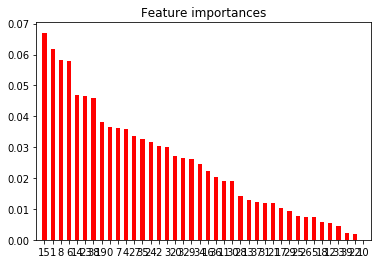

In [9]:
importances = rf0.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
width=0.5
plt.bar(range(X.shape[1]), importances[indices],width=width,color="r")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.savefig('C:/Users/Yee Shen/Desktop/source/figure/weibo&taobao.png',dpi = 300)

In [97]:
gongzuobu[['original_weibo','sales_month']].corr()

,original_weibo,sales_month
original_weibo,1.000000,0.094987
sales_month,0.094987,1.000000


In [ ]:
gongzuobu[['repost_weibo','sales_month']].corr()

In [ ]:
gongzuobu[['like_weibo','sales_month']].corr()

In [ ]:
gongzuobu[['fans','sales_month']].corr()

In [ ]:
gongzuobu[['av_comment','sales_month']].corr()

In [ ]:
gongzuobu[['av_like','sales_month']].corr()

In [ ]:
gongzuobu[['av_repost','sales_month']].corr()

In [ ]:
gongzuobu[['follow','sales_month']].corr()

In [ ]:
rf0.predict(X_test)  # 这里最简单的情况实验成功。

In [ ]:
y_train

In [ ]:
param = [{'n_estimators': list(range(10, 101, 10))}]
gsearch1 = GridSearchCV( estimator = RandomForestClassifier(oob_score=True, random_state=10),
                         param_grid = param, scoring = 'accuracy',cv = 8)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
help(RandomForestClassifier)

In [ ]:
param = [{'min_samples_split':list(range(2, 11, 1))}]
gsearch1 = GridSearchCV( RandomForestClassifier( ),param_grid = param, scoring = 'accuracy',cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param = [{'min_samples_leaf':list(range(10, 101, 10))}]
gsearch1 = GridSearchCV( RandomForestClassifier( ),param_grid = param, scoring = 'accuracy',cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param = [{'min_samples_leaf':list(range(10, 101, 10))}]
gsearch1 = GridSearchCV( RandomForestClassifier( ),param_grid = param, scoring = 'accuracy',cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_